# Classification Model of Purchase Intentions
### DSCI100 Project Proposal Group 13

## Introduction
With e-commerce becoming more and more prevalent in today’s environment, businesses within this sector need to understand what factors influence a visitor to transform into a purchaser. Hence, a lot of current research is focused on real-time revenue predictors for these businesses. In this project, we aim to build a classification model to predict the purchase intentions of prospective buyers, and determine whether they will make a purchase or not using the available website usage data.

This project uses a dataset from the UCI Machine Learning Repository called the Online Shoppers Purchasing Intention Dataset, which contains information about different users, such as the time spent in each web page and if that lead to a purchase or not.

The dataset consists of 12,330 rows of observations associated with 10 numerical and 8 categorical attributes. The dataset was formed so that each observation (session) would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

The attributes in the dataset can be split into three categories: data related to the page that the user lands on, Google Analytics metrics, and user visit data. The 'Revenue' attribute determines whether a session ended in a purchase or not, and would be used as the class label for our project.



## Preliminary exploratory data analysis

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

### Read and wrangle the data set


In [4]:
set.seed(3456)
shoppers <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv")
shoppers

Parsed with column specification:
cols(
  Administrative = col_double(),
  Administrative_Duration = col_double(),
  Informational = col_double(),
  Informational_Duration = col_double(),
  ProductRelated = col_double(),
  ProductRelated_Duration = col_double(),
  BounceRates = col_double(),
  ExitRates = col_double(),
  PageValues = col_double(),
  SpecialDay = col_double(),
  Month = col_character(),
  OperatingSystems = col_double(),
  Browser = col_double(),
  Region = col_double(),
  TrafficType = col_double(),
  VisitorType = col_character(),
  Weekend = col_logical(),
  Revenue = col_logical()
)



Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0.0,0,0,1,0.000000,0.200000000,0.200000000,0.00000,0.0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0.0,0,0,2,64.000000,0.000000000,0.100000000,0.00000,0.0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,0.0,0,0,1,0.000000,0.200000000,0.200000000,0.00000,0.0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0.0,0,0,2,2.666667,0.050000000,0.140000000,0.00000,0.0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0.0,0,0,10,627.500000,0.020000000,0.050000000,0.00000,0.0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0.0,0,0,19,154.216667,0.015789474,0.024561404,0.00000,0.0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE
0,0.0,0,0,1,0.000000,0.200000000,0.200000000,0.00000,0.4,Feb,2,4,3,3,Returning_Visitor,FALSE,FALSE
1,0.0,0,0,0,0.000000,0.200000000,0.200000000,0.00000,0.0,Feb,1,2,1,5,Returning_Visitor,TRUE,FALSE
0,0.0,0,0,2,37.000000,0.000000000,0.100000000,0.00000,0.8,Feb,2,2,2,3,Returning_Visitor,FALSE,FALSE


In [5]:
shoppers <- shoppers %>%
    select(BounceRates:Month, Weekend:Revenue) %>%
    mutate(Revenue = as_factor(Revenue))

shoppers_split <- initial_split(shoppers, prop = 0.5, strata = Revenue)
shoppers_train <- training(shoppers_split)
shoppers_test <- testing(shoppers_split)

head(shoppers_train)

BounceRates,ExitRates,PageValues,SpecialDay,Month,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<fct>
0.20,0.20000000,0,0,Feb,FALSE,FALSE
0.20,0.20000000,0,0,Feb,FALSE,FALSE
0.05,0.14000000,0,0,Feb,FALSE,FALSE
0.02,0.05000000,0,0,Feb,TRUE,FALSE
0.20,0.20000000,0,0,Feb,TRUE,FALSE
0.00,0.06666667,0,0,Feb,FALSE,FALSE


### Summarize the training set

In [7]:
summary(shoppers_train)

training_set_revenue <- shoppers_train %>%
 group_by(Revenue) %>%
 summarize(
 count = n()
 )
training_set_revenue

  BounceRates        ExitRates         PageValues        SpecialDay     
 Min.   :0.00000   Min.   :0.00000   Min.   :  0.000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.01427   1st Qu.:  0.000   1st Qu.:0.00000  
 Median :0.00303   Median :0.02501   Median :  0.000   Median :0.00000  
 Mean   :0.02146   Mean   :0.04246   Mean   :  5.887   Mean   :0.06125  
 3rd Qu.:0.01667   3rd Qu.:0.04865   3rd Qu.:  0.000   3rd Qu.:0.00000  
 Max.   :0.20000   Max.   :0.20000   Max.   :360.953   Max.   :1.00000  
    Month            Weekend         Revenue    
 Length:6165        Mode :logical   FALSE:5211  
 Class :character   FALSE:4692      TRUE : 954  
 Mode  :character   TRUE :1473                  
                                                
                                                
                                                

`summarise()` ungrouping output (override with `.groups` argument)



Revenue,count
<fct>,<int>
FALSE,5211
TRUE,954


There are 6165 observations in the training set. 

|    |BounceRates|ExitRates    |PageValues   |SpecialDay|
|:-: |---        |---          |---          |-------------|
|Mean|  0.02146  | 0.04246     |     5.887   |    0.06125  |

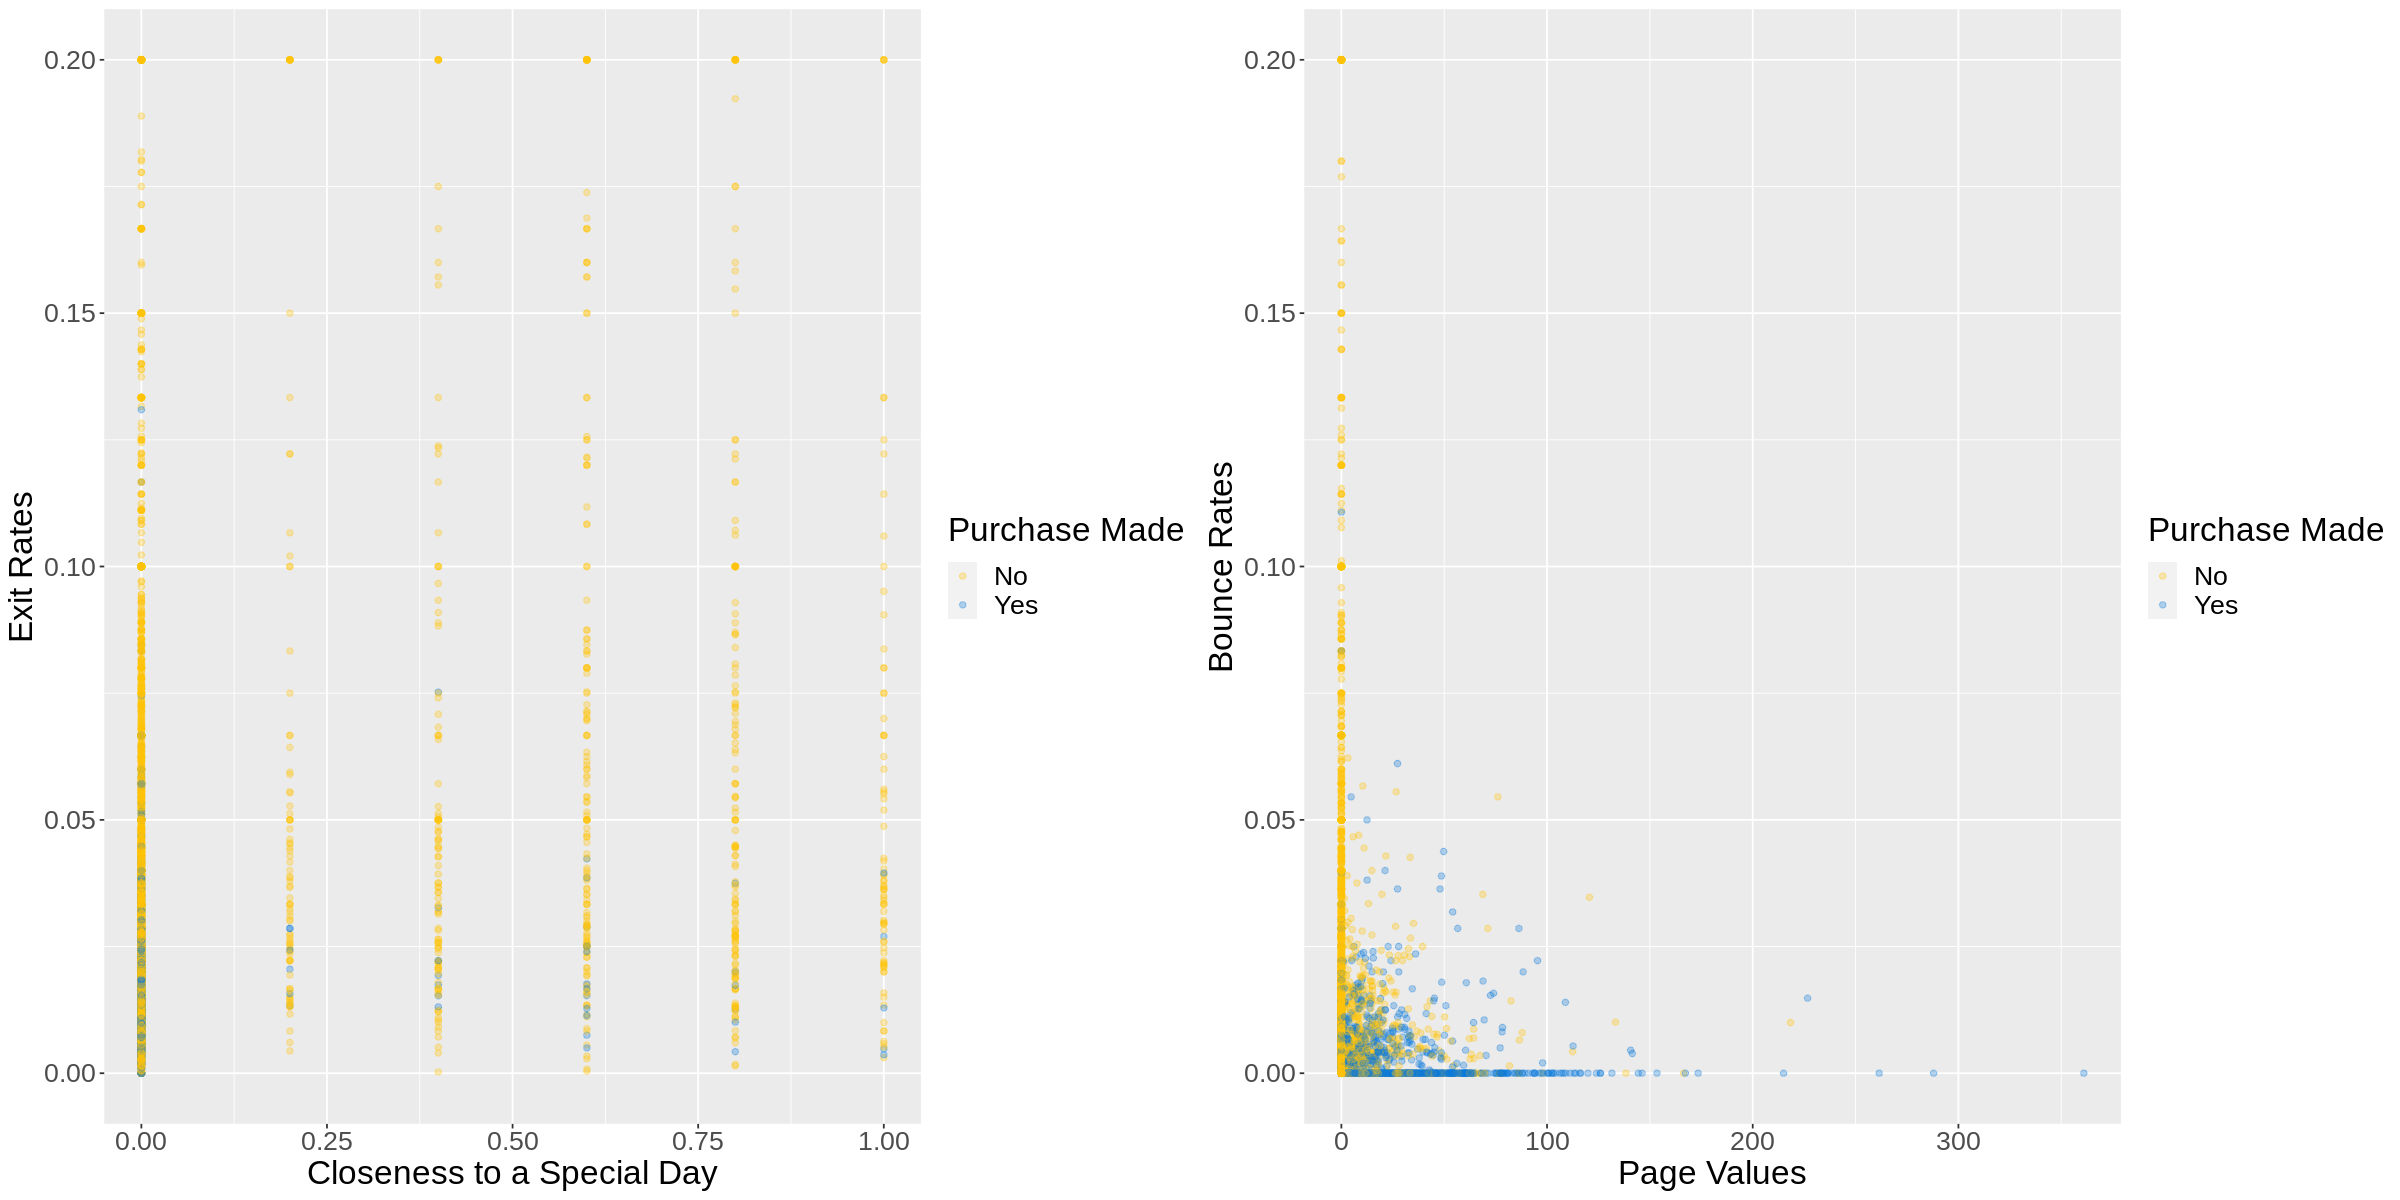

In [6]:
# your code here
options(repr.plot.width = 20, repr.plot.height = 10)

rate_plot <- shoppers_train %>%
    ggplot(aes(x = SpecialDay, y = ExitRates, colour = Revenue)) +
    geom_point(alpha = 0.3) +
    labs(x="Closeness to a Special Day", y = "Exit Rates", colour = "Purchase Made") +
    theme(text = element_text(size = 20)) +
    scale_color_manual(labels = c("No", "Yes"), values = c("#FFC20A", "#0C7BDC"))

value_plot <- shoppers_train %>%
    ggplot(aes(x = PageValues, y = BounceRates, colour = Revenue)) +
    geom_point(alpha = 0.3) +
    labs(x="Page Values", y = "Bounce Rates", colour = "Purchase Made") +
    theme(text = element_text(size = 20)) +
    scale_color_manual(labels = c("No", "Yes"), values = c("#FFC20A", "#0C7BDC"))

library(cowplot)
plot_grid(rate_plot, value_plot, nrow = 1)

## Methods
Our data will first be split into a training set and a testing set, and as the original data is in a tidy format with no data missing, there is no need for further cleaning. Since we have a large data frame of 12330 rows, we will be splitting the data 50/50 to each set. If our data frame was smaller, then this ratio could result in a biased model that is heavily reliant on what rows happened to be selected for training, however half of our database is still 6165 rows which will be sufficient for providing a large enough sample. We will then create a classification model using tidymodels. The model will predict the “Revenue” outcome, which indicates whether or not a user made a purchase through the factors TRUE/FALSE.  The variables we will be using include: "Bounce Rate", "Exit Rate", "Page Value", “Special Day”, “Month”, and “Weekend”. 

The model will be a k nearest-neighbour classification model, with the number of neighbours chosen through executing a cross-validation.

## Expected outcomes and significance
According to our hypothesis, we expect to find that on special days there will be more website traffic than on regular days, and hence more revenue. Moreover, we are also expecting that the bounce rate may be higher on special days as people may look around at multiple websites before choosing one to shop from. Bounce rate and exit rate are expected to have a negative impact on the revenue.

The results of this project could serve as a guide for e-commerce businesses across the world on how to increase customer involvement and effectively increase their revenue by analyzing and focusing on the factors of their web-traffic affecting their revenue.
